In [ ]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.


In [ ]:
cd Mecab-ko-for-Google-Colab

/content/Mecab-ko-for-Google-Colab


In [ ]:
!bash install_mecab-ko_on_colab_light_220429.sh

In [ ]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [ ]:
# 라이브러리 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import json
import konlpy
from konlpy.tag import Okt
from konlpy.tag import Kkma

In [ ]:
data = pd.read_json('/content/drive/MyDrive/빅데온탑걸즈/데이터/book_review_all.json')
data.head()

,category,title,author,review
0,소설,돌연한 출발,프란츠 카프카,"[얼마나 재밌을지 기대되요, 표지도 너무 이쁘고 책의날 카프카를 읽을수 있었네요, ..."
1,소설,메리골드 마음 세탁소,윤정은,"[마음이 힐링 되는 느낌이에요, 매우만족합니다\n추천드려요, 저에게도 필요해요\n마..."
2,소설,스즈메의 문단속,신카이 마코토,"[영화랑 또 다른 매력이 느껴져서 좋아요!!, 아이들이 재미있게 보네요, 너무 재미..."
3,소설,2023 제14회 젊은작가상 수상작품집,이미상,"[재미있게 읽었습니다, 문학동네가 배가 부른걸까?\n그래도 대상받은것이라 인내심을 ..."
4,소설,불편한 편의점(40만부 기념 벚꽃 에디션),김호연,"[읽다보니 시간 잘가고 재밌어요, 순식간에 읽어 내려감, 사람과 사람간의 얘기가 좋..."


In [ ]:
import re
from konlpy.tag import Mecab
mecab = Mecab()

#review0 : review에서 리스트 품
#rv_noun : mecab으로 명사추출 -> 리스트형식으로 나오길래
#rv_noun0 : rv_noun에서 리스트 품

data['review0']=0
data['rv_noun']=0
data['rv_noun0']=0
wordd=[]
for i in range(data.shape[0]):
  data['review0'][i]=''.join(data.review[i])
  data['review0'][i] = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', data['review0'][i])
  review=data['review0'][i]
  result = mecab.nouns(review)
  data['rv_noun'][i] = result
  data['rv_noun0'][i]=' '.join(data.rv_noun[i])
  words = data.rv_noun0[i].split()
  wordd = [word for word in words if word not in ['기대', '소설', '구매','이야기', '작품', '작가','중간','걸까','아기','아이','부모','육아','엄마','사람'] ]
  data['rv_noun0'][i]=' '.join(wordd)

In [ ]:
categories = data['category'].unique()
categories

array(['소설', '시/에세이', '인문', '가정/육아', '요리', '건강', '취미/실용/스포츠', '경제/경영',
       '자기계발', '정치/사회', '역사/문화', '종교', '예술/대중문화', '기술/공학', '외국어', '과학',
       '취업/수험서', '여행', '컴퓨터/IT', '잡지', '청소년', '초등참고서', '유아(0~7세)',
       '어린이(초등)', '만화', '대학교재', '한국소개도서', '교보오리지널', '중/고등참고서'],
      dtype=object)

In [ ]:
data1= data[data['category'] =='소설']
data2= data[data['category'] =='시/에세이']
data3= data[data['category'] =='인문']
data4= data[data['category'] =='가정/육아']
data5= data[data['category'] =='요리']
data6= data[data['category'] =='건강']
data7= data[data['category'] =='취미/실용/스포츠']
data8= data[data['category'] =='경제/경영']
data9= data[data['category'] =='자기계발']
data10= data[data['category'] =='정치/사회']
data11= data[data['category'] =='역사/문화']
data12= data[data['category'] =='종교']
data13= data[data['category'] =='예술/대중문화']
data14= data[data['category'] =='기술/공학']
data15= data[data['category'] =='외국어']
data16= data[data['category'] =='과학']
data17= data[data['category'] =='취업/수험서']
data18= data[data['category'] =='여행']
data19= data[data['category'] =='컴퓨터/IT']
data20= data[data['category'] =='잡지']
data21= data[data['category'] =='역사/문화']
data22= data[data['category'] =='청소년']
data23= data[data['category'] =='초등참고서']
data24= data[data['category'] =='유아(0~7세)']
data25= data[data['category'] =='어린이(초등)']
data26= data[data['category'] =='만화']
data27= data[data['category'] =='대학교재']
data28= data[data['category'] =='한국소개도서']
data29= data[data['category'] =='교보오리지널']
data30= data[data['category'] =='중/고등참고서']

# **----소설category 군집분석-----**

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
#from scipy.cluster.hierarchy import dendrogram, linkage, ward
#from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# TF는 문서 내에서의 단어 등장 빈도를 나타냄 ---> TF는 문서 내에서 자주 등장하는 단어를 강조
# TF-IDF는 단어의 상대적인 중요성을 고려하여 계산된 값 ---> TF-IDF는 희귀한 단어에 더 높은 가중치를 부여

In [ ]:
tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform( data1['rv_noun0'] )
feature_names=tfidf.get_feature_names_out()
print(tfidf_vectors.shape)

(50, 14035)


# DBSCAN

In [ ]:
# DBSCAN은 데이터의 밀도를 기반으로 클러스터를 형성하므로 클러스터의 개수를 미리 지정할 필요가 없음
# DBSCAN은 이상치(노이즈) 데이터를 식별할 수 있는 장점
# 밀도 추정에 따른 매개변수 설정에 민감

In [ ]:
# eps : 이웃(주변) 반경
# min_samples : 최소 지점의 수(최소 포인트 수)
# metric : 거리 측정 방식

from sklearn.metrics import silhouette_score

db_param_options = [[0.3,2],[0.4,2],[0.5,2],[0.6,2],[0.7,2],[0.8,2]]

for ep,min_sample in db_param_options:
    # Generate clusters using DBSCAN
    db = DBSCAN(eps=ep, min_samples = min_sample, metric='cosine')
    db_clusters = db.fit_predict(tfidf_vectors)
    print("Eps: ", ep, "Min Samples: ", min_sample)
    print("DBSCAN Clustering: ", silhouette_score(tfidf_vectors, db_clusters))

Eps:  0.3 Min Samples:  2
DBSCAN Clustering:  0.0804017258578751
Eps:  0.4 Min Samples:  2
DBSCAN Clustering:  0.0804017258578751
Eps:  0.5 Min Samples:  2
DBSCAN Clustering:  0.0923922423342869
Eps:  0.6 Min Samples:  2
DBSCAN Clustering:  0.08905470476437113
Eps:  0.7 Min Samples:  2
DBSCAN Clustering:  0.09227224468487728
Eps:  0.8 Min Samples:  2
DBSCAN Clustering:  0.06262035647587993


In [ ]:
# eps 값이 클 수록 더 큰 클러스터가 형성
# min_samples 값을 증가시키면 더 밀집된 클러스터만 인식

dbscan= DBSCAN(eps=0.5,min_samples=2, metric='cosine')
dbscan_label=dbscan.fit_predict(tfidf_vectors)
print(dbscan_label)

# cluser:-1 --> 밀도가 충분하지 않거나 주변 클러스터와 연결되지 않는 데이터 포인트들은 잡음으로 간주됨, 즉 잘 분류를 못하는 값!

[-1 -1  0 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  2 -1  0 -1 -1 -1  3 -1 -1 -1  3 -1 -1  2 -1 -1 -1 -1 -1 -1
 -1 -1]


In [ ]:
data1['cluster']=dbscan_label
for cluster_num in set(dbscan_label):
  print('Cluster: {}'.format(cluster_num))
  df=data1[ data1['cluster'] == cluster_num ]
  for title in df['title']:
    print(title)
  print()

# cluster=0 : 일본소설, 신카이마코도 감동 작품 중심으로 모임
# cluster=1 : 불편한 편의점 시리즈
# cluster=2 : 달러구트 시리즈
# cluster=3 : 파친코 시리즈

Cluster: 0
스즈메의 문단속
스즈메의 문단속
너의 이름은.

Cluster: 1
불편한 편의점(40만부 기념 벚꽃 에디션)
바다가 들리는 편의점
불편한 편의점 2(단풍 에디션)

Cluster: 2
달러구트 꿈 백화점(레인보우 에디션)
달러구트 꿈 백화점 2(레인보우 에디션)

Cluster: 3
파친코 2
파친코 1

Cluster: -1
돌연한 출발
메리골드 마음 세탁소
2023 제14회 젊은작가상 수상작품집
아버지의 해방일지
고래
구의 증명
모순
각각의 계절
세상의 마지막 기차역(리커버 에디션)
블랙 쇼맨과 환상의 여자
참을 수 없는 존재의 가벼움
이끼숲
요괴어사
저주토끼
데미안
오늘 밤, 세계에서 이 사랑이 사라진다 해도
인간 실격
멋진 신세계
종이달
던전에서 만남을 추구하면 안 되는 걸까(소책자 한정판) 18
환상서점
언어의 무게
이토록 평범한 미래
하얼빈
어서 오세요, 휴남동 서점입니다
옆집 천사님 때문에 어느샌가 인간적으로 타락한 사연 7
디 에센셜: 죄와 벌
견딜 수 없는 사랑
작별인사
우리가 빛의 속도로 갈 수 없다면
나는 소망한다 내게 금지된 것을
노르웨이의 숲
미드나잇 라이브러리(평행우주 에디션)
날씨의 아이(일러스트 에디션)
Re: 제로부터 시작하는 이세계 생활 31
싯다르타
호밀밭의 파수꾼
동물농장
청춘 돼지는 마이 스튜던트의 꿈을 꾸지 않는다 12
지구 끝의 온실



<ipython-input-262-9b9f335e352d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['cluster']=dbscan_label


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
reduced_X = pca.fit_transform(tfidf_vectors.toarray())

In [ ]:
# 잡음 제외하고 plot그리기
data1['cluster']=dbscan_label
d = data1[~data1.cluster.isin([-1])]
value=-1
idx=np.where(dbscan_label == value)[0]
labels = np.delete(dbscan_label,idx)
for cluster_num in set(labels):
  print('\n','Cluster: {}'.format(cluster_num))
  df=d[ d['cluster'] == cluster_num ]
  for title in df['title']:
    print(title)

reduced_X0=np.delete(reduced_X,idx, axis=0)


 Cluster: 0
스즈메의 문단속
스즈메의 문단속
너의 이름은.

 Cluster: 1
불편한 편의점(40만부 기념 벚꽃 에디션)
바다가 들리는 편의점
불편한 편의점 2(단풍 에디션)

 Cluster: 2
달러구트 꿈 백화점(레인보우 에디션)
달러구트 꿈 백화점 2(레인보우 에디션)

 Cluster: 3
파친코 2
파친코 1


<ipython-input-264-7de69aeb2049>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['cluster']=dbscan_label


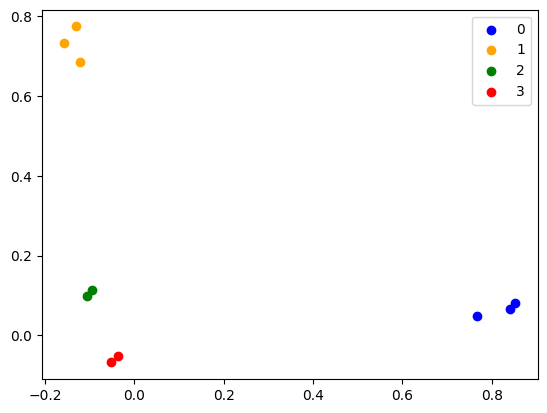

In [ ]:
# 잡음 제외하고 시각화
colors = ['blue', 'orange', 'green', 'red','pink','brown','black','purple','lightblue']
colors = ['blue', 'orange', 'green', 'red','pink']
for label in set(labels):
  color = colors[label % len(colors)]
  plt.scatter(reduced_X0[labels == label, 0], reduced_X0[labels == label, 1], color=color, label=label)

plt.legend()
plt.show()

# **----시/에세이category 군집분석-----**

In [ ]:
tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform( data2['rv_noun0'] )
feature_names=tfidf.get_feature_names_out()

In [ ]:
# eps : 이웃(주변) 반경
# min_samples : 최소 지점의 수(최소 포인트 수)
# metric : 거리 측정 방식

from sklearn.metrics import silhouette_score

db_param_options = [[0.1,2],[0.2,2],[0.3,2],[0.4,2]]

for ep,min_sample in db_param_options:
    # Generate clusters using DBSCAN
    db = DBSCAN(eps=ep, min_samples = min_sample, metric='cosine')
    db_clusters = db.fit_predict(tfidf_vectors)
    print("Eps: ", ep, "Min Samples: ", min_sample)
    print("DBSCAN Clustering: ", silhouette_score(tfidf_vectors, db_clusters))

Eps:  0.1 Min Samples:  2
DBSCAN Clustering:  -0.04974249403532473
Eps:  0.2 Min Samples:  2
DBSCAN Clustering:  -0.04974249403532473
Eps:  0.3 Min Samples:  2
DBSCAN Clustering:  -0.035747556200142944
Eps:  0.4 Min Samples:  2
DBSCAN Clustering:  0.029397646545049547


In [ ]:
dbscan= DBSCAN(eps=0.4,min_samples=2, metric='cosine')
dbscan_label=dbscan.fit_predict(tfidf_vectors)
print(dbscan_label)

[ 0 -1 -1  0 -1 -1 -1  0  0 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2  0
  0 -1 -1  2 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0 -1 -1  0
 -1  0]


In [ ]:
data2['cluster']=dbscan_label
for cluster_num in set(dbscan_label):
  print('Cluster: {}'.format(cluster_num))
  df=data2[ data2['cluster'] == cluster_num ]
  for title in df['title']:
    print(title)
  print()

# cluster=0 : 나 자신에게 위로가 되는 책 중심
# cluster=1 : 나를 사랑하는 책 중심
# cluster=2 : 수용소 시리즈

Cluster: 0
당신은 결국 무엇이든 해내는 사람(10만 부 기념 특별 리커버 에디션)
작은 별이지만 빛나고 있어(20만 부 기념 한정판 에디션)
잘될 수밖에 없는 너에게(10만부 기념 응원 에디션)
잘했고 잘하고 있고 잘 될 것이다(스페셜 리미티드 에디션)
잘 살고 싶은 마음이 어렵게 느껴질 때
바다는 잘 있습니다
나에게 고맙다(30만 부 기념 전면 개정판)
나는 당신이 행복했으면 좋겠습니다
모든 사람에게 좋은 사람일 필요는 없어
안녕, 소중한 사람

Cluster: 1
꽃을 보듯 너를 본다
나는 오래된 거리처럼 너를 사랑하고

Cluster: 2
빅터 프랭클의 죽음의 수용소에서
죽음의 수용소에서

Cluster: -1
이지성의 1만 킬로미터
찌그러져도 괜찮아
기분이 태도가 되지 말자
나의 봄날인 너에게
그리고 모든 것이 변했다
열 번 잘해도 한 번 실수로 무너지는 게 관계다
괜찮아, 그 길 끝에 행복이 기다릴 거야
한 번뿐인 인생은 어떻게 살아야 하는가
괜찮은 어른이 되고 싶어서
우리에게는 온기가 있기에
미셸 오바마 자기만의 빛
인생의 역사
망그러진 만화(벚꽃 에디션)
고요한 포옹
누구에게도 상처받을 필요는 없다
달리기를 말할 때 내가 하고 싶은 이야기
불안
기분을 관리하면 인생이 관리된다
월든(완결판)
그냥 밥 먹자는 말이 아니었을지도 몰라
무례한 사람에게 웃으며 대처하는 법(50만 부 기념 스페셜 개정판)
생에 감사해
마음 방울 채집
어린이라는 세계
우아한 언어
이대호, 도전은 끝나지 않았다
오늘부터 300일
너의 하루가 따숩길 바라
모든 것은 기본에서 시작한다
여행의 이유
언어의 온도(170만부 기념 에디션)
망그러진 만화(벚꽃 에디션 & 벚꽃 향수 박스 한정판)
형사 박미옥
누군가는 사랑을 말해야 하지 않을까
그대 늙어가는 것이 아니라 익어가는 것이다
죽고 싶지만 떡볶이는 먹고 싶어



<ipython-input-270-20a1ff2cea92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['cluster']=dbscan_label


<ipython-input-271-541447411db1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['cluster']=dbscan_label


Cluster: 0
당신은 결국 무엇이든 해내는 사람(10만 부 기념 특별 리커버 에디션)
작은 별이지만 빛나고 있어(20만 부 기념 한정판 에디션)
잘될 수밖에 없는 너에게(10만부 기념 응원 에디션)
잘했고 잘하고 있고 잘 될 것이다(스페셜 리미티드 에디션)
잘 살고 싶은 마음이 어렵게 느껴질 때
바다는 잘 있습니다
나에게 고맙다(30만 부 기념 전면 개정판)
나는 당신이 행복했으면 좋겠습니다
모든 사람에게 좋은 사람일 필요는 없어
안녕, 소중한 사람
Cluster: 1
꽃을 보듯 너를 본다
나는 오래된 거리처럼 너를 사랑하고
Cluster: 2
빅터 프랭클의 죽음의 수용소에서
죽음의 수용소에서


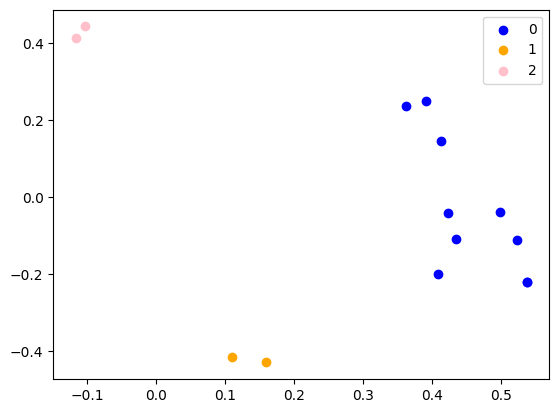

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
reduced_X = pca.fit_transform(tfidf_vectors.toarray())

# 잡음 제외
data2['cluster']=dbscan_label
d = data2[~data2.cluster.isin([-1])]
value=-1
idx=np.where(dbscan_label == value)[0]
labels = np.delete(dbscan_label,idx)
for cluster_num in set(labels):
  print('Cluster: {}'.format(cluster_num))
  df=d[ d['cluster'] == cluster_num ]
  for title in df['title']:
    print(title)

reduced_X0=np.delete(reduced_X,idx, axis=0)

# 잡음 제외하고 시각화
colors = ['blue', 'orange', 'pink']
for label in set(labels):
  color = colors[label % len(colors)]
  plt.scatter(reduced_X0[labels == label, 0], reduced_X0[labels == label, 1], color=color, label=label)

plt.legend()
plt.show()

# **가정/육아 군집분석**

In [ ]:
tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform( data4['rv_noun0'] )
feature_names=tfidf.get_feature_names_out()

In [ ]:
from sklearn.metrics import silhouette_score

db_param_options = [[0.5,2],[0.6,3],[0.7,2],[0.8,2]]

for ep,min_sample in db_param_options:
    # Generate clusters using DBSCAN
    db = DBSCAN(eps=ep, min_samples = min_sample, metric='cosine')
    db_clusters = db.fit_predict(tfidf_vectors)
    print("Eps: ", ep, "Min Samples: ", min_sample)
    print("DBSCAN Clustering: ", silhouette_score(tfidf_vectors, db_clusters))

Eps:  0.5 Min Samples:  2
DBSCAN Clustering:  0.05158065220821693
Eps:  0.6 Min Samples:  3
DBSCAN Clustering:  0.0228371775193744
Eps:  0.7 Min Samples:  2
DBSCAN Clustering:  0.018784166911104672
Eps:  0.8 Min Samples:  2
DBSCAN Clustering:  0.009038283201647877


In [ ]:
dbscan= DBSCAN(eps=0.5,min_samples=2, metric='cosine')
dbscan_label=dbscan.fit_predict(tfidf_vectors)
print(dbscan_label)

[ 0 -1  1 -1  2 -1 -1  3 -1  4  1 -1 -1 -1 -1  5 -1  5 -1  3 -1 -1 -1  0
 -1 -1 -1  1 -1 -1 -1 -1 -1  4 -1 -1  2  3 -1 -1 -1 -1 -1 -1 -1  6 -1 -1
 -1  6]


In [ ]:
data4['cluster']=dbscan_label
for cluster_num in set(dbscan_label):
  print('\n','Cluster: {}'.format(cluster_num))
  df=data4[ data4['cluster'] == cluster_num ]
  for title in df['title']:
    print(title)
  print()


 Cluster: 0
똑게육아
잘 자고 잘 먹는 아기의 시간표


 Cluster: 1
사춘기 아들의 마음을 잡아주는 부모의 말 공부
사춘기 딸에게 힘이 되어주는 부모의 말 공부
아들의 뇌


 Cluster: 2
임신 출산 육아 대백과(2022~2023)
하루 한 장 임신 출산 데일리북


 Cluster: 3
어떻게 말해줘야 할까
금쪽이들의 진짜 마음속
못 참는 아이 욱하는 부모


 Cluster: 4
내 아이를 위한 주의력 수업
4~7세보다 중요한 시기는 없습니다


 Cluster: 5
감정에 휘둘리는 아이 감정을 잘 다루는 아이
내 아이를 위한 감정코칭


 Cluster: 6
올리버쌤의 미국식 아이 영어 습관 365
우리 아이 첫 영어 공부


 Cluster: -1
66일 인문학 대화법
이은경쌤의 초등어휘일력 365
세상에서 가장 쉬운 본질육아
아기 발달 백과
삐뽀삐뽀 119 소아과
베싸육아
세상에서 제일 재밌는 종이접기
부모의 말
엄마의 내공으로 영어를 다시 시작합니다
엄마 나는 자라고 있어요
이성을 잃지 않고 아이를 대하는 마음챙김 육아
아이가 버거운 엄마 엄마가 필요한 아이
어머니, 사교육을 줄이셔야 합니다
ADHD 우리 아이 어떻게 키워야 할까
조선미의 현실 육아 상담소
엄마의 말 연습
0~5세 말걸기 육아의 힘
EBS 당신의 문해력(초등 어휘력 향상 워크북 특별 부록 한정판)
프랑스 아이처럼
교과서는 사교육보다 강하다
국어머리 공부법
스카이 버스
아이는 엄마의 자존감을 먹고 자란다
10대 놀라운 뇌 불안한 뇌 아픈 뇌
부모 심리 수업
늦기 전에 공부정서를 키워야 합니다
아이라는 숲
공부하는 뇌, 성장하는 마음
어린이를 위한 초등 매일 글쓰기의 힘: 세줄쓰기
하루 한 장 365 인문학 달력(리커버)
하루 5분 아빠 목소리
부모 인문학 수업
홈파티스타
아이 마음에 상처 주지 않는 습관(뉴에디션)



<ipython-input-275-2841b60c47ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['cluster']=dbscan_label


<ipython-input-276-d5ffc1fc77e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['cluster']=dbscan_label



 Cluster: 0
똑게육아
잘 자고 잘 먹는 아기의 시간표

 Cluster: 1
사춘기 아들의 마음을 잡아주는 부모의 말 공부
사춘기 딸에게 힘이 되어주는 부모의 말 공부
아들의 뇌

 Cluster: 2
임신 출산 육아 대백과(2022~2023)
하루 한 장 임신 출산 데일리북

 Cluster: 3
어떻게 말해줘야 할까
금쪽이들의 진짜 마음속
못 참는 아이 욱하는 부모

 Cluster: 4
내 아이를 위한 주의력 수업
4~7세보다 중요한 시기는 없습니다

 Cluster: 5
감정에 휘둘리는 아이 감정을 잘 다루는 아이
내 아이를 위한 감정코칭

 Cluster: 6
올리버쌤의 미국식 아이 영어 습관 365
우리 아이 첫 영어 공부


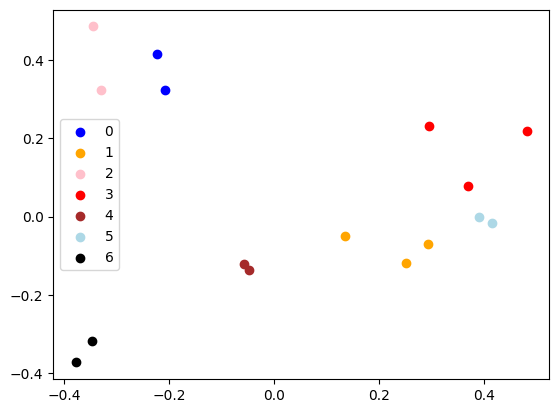

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
reduced_X = pca.fit_transform(tfidf_vectors.toarray())

# 잡음 제외
data4['cluster']=dbscan_label
d = data4[~data4.cluster.isin([-1])]
value=-1
idx=np.where(dbscan_label == value)[0]
labels = np.delete(dbscan_label,idx)
for cluster_num in set(labels):
  print('\n','Cluster: {}'.format(cluster_num))
  df=d[ d['cluster'] == cluster_num ]
  for title in df['title']:
    print(title)

reduced_X0=np.delete(reduced_X,idx, axis=0)

# 잡음 제외하고 시각화
colors = ['blue', 'orange', 'pink','red','brown','lightblue','black']
for label in set(labels):
  color = colors[label % len(colors)]
  plt.scatter(reduced_X0[labels == label, 0], reduced_X0[labels == label, 1], color=color, label=label)

plt.legend(loc='center left')
plt.show()

# K-means

In [ ]:
# 계산 효율성이 높아 대규모 데이터에 적합
# 클러스터의 개수를 미리 지정하여 명확한 클러스터링 결과를 얻을 수 있음
# 이상치 데이터에 민감할 수 있으며, 이를 처리하는 기능이 내장되어 있지 않음

# **-- 소설 category --**

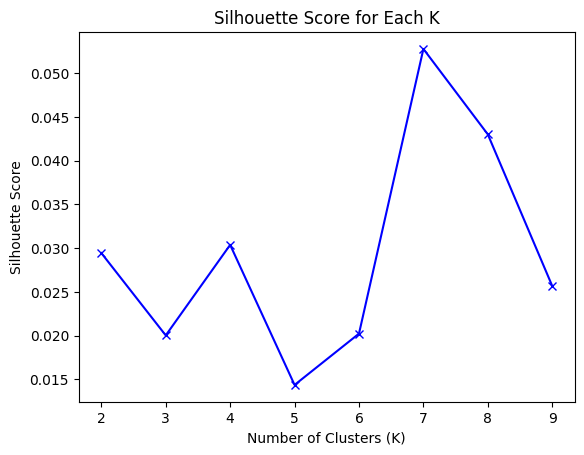

In [ ]:
from sklearn.metrics import silhouette_score

k_values = range(2, 10)  # 시도할 K 값의 범위
silhouette_scores = []

for k in k_values:
  tfidf = TfidfVectorizer()
  tfidf_vectors = tfidf.fit_transform( data1['rv_noun0'] )
  kmeans = KMeans(n_clusters=k, n_init='auto')
  kmeans.fit(tfidf_vectors)
  labels = kmeans.labels_
  silhouette_avg = silhouette_score(tfidf_vectors, labels)
  silhouette_scores.append(silhouette_avg)

# K 값에 대한 실루엣 계수 시각화
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Each K')
plt.show()

In [ ]:
tfidf_vectors = tfidf.fit_transform( data1['rv_noun0'] )
kmeans = KMeans(n_clusters=k, n_init='auto')

k=8
kmeans=KMeans(n_clusters=k,max_iter=100,random_state=2023)
kmeans_label = kmeans.fit_predict(tfidf_vectors)
kmeans_centers = kmeans.cluster_centers_

data1['cluster']=kmeans_label
data1['cluster'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-279-99a272f091f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['cluster']=kmeans_label


7    15
2    13
4     8
1     4
6     4
3     3
5     2
0     1
Name: cluster, dtype: int64

In [ ]:
for cluster_num in set(kmeans_label):
  print('\n','Cluster: {}'.format(cluster_num))
  df=data1[ data1['cluster'] == cluster_num ]
  for title in df['title']:
    print(title)


 Cluster: 0
종이달

 Cluster: 1
스즈메의 문단속
스즈메의 문단속
너의 이름은.
날씨의 아이(일러스트 에디션)

 Cluster: 2
고래
구의 증명
세상의 마지막 기차역(리커버 에디션)
블랙 쇼맨과 환상의 여자
참을 수 없는 존재의 가벼움
이끼숲
데미안
오늘 밤, 세계에서 이 사랑이 사라진다 해도
환상서점
견딜 수 없는 사랑
노르웨이의 숲
싯다르타
호밀밭의 파수꾼

 Cluster: 3
요괴어사
파친코 2
파친코 1

 Cluster: 4
메리골드 마음 세탁소
불편한 편의점(40만부 기념 벚꽃 에디션)
바다가 들리는 편의점
불편한 편의점 2(단풍 에디션)
각각의 계절
어서 오세요, 휴남동 서점입니다
옆집 천사님 때문에 어느샌가 인간적으로 타락한 사연 7
디 에센셜: 죄와 벌

 Cluster: 5
달러구트 꿈 백화점(레인보우 에디션)
달러구트 꿈 백화점 2(레인보우 에디션)

 Cluster: 6
아버지의 해방일지
모순
나는 소망한다 내게 금지된 것을
미드나잇 라이브러리(평행우주 에디션)

 Cluster: 7
돌연한 출발
2023 제14회 젊은작가상 수상작품집
저주토끼
인간 실격
멋진 신세계
던전에서 만남을 추구하면 안 되는 걸까(소책자 한정판) 18
언어의 무게
이토록 평범한 미래
하얼빈
작별인사
우리가 빛의 속도로 갈 수 없다면
Re: 제로부터 시작하는 이세계 생활 31
동물농장
청춘 돼지는 마이 스튜던트의 꿈을 꾸지 않는다 12
지구 끝의 온실


In [ ]:
centroid_feature = kmeans_centers.argsort()[:,::-1]

for cluster_num in set(kmeans_label):
    print('Cluster: {}'.format(cluster_num))

    df=data1[ data1['cluster'] == cluster_num ]
    print(df['title'].tolist())

    top_feature_indexes =centroid_feature[cluster_num,:10]
    top_features = [feature_names[i] for i in top_feature_indexes ]
    print(top_features)

    top_feature_values = kmeans_centers[cluster_num, top_feature_indexes].tolist()
    print(top_feature_values, '\n')

# cluster=0 : 일본소설, 신카이마코도 감동 작품 중심으로 모임
# cluster=1 : 파친코는 재일조선인, 요괴어사는 조선시대 배경이라 조선이라는 키워드로 묶임
# cluster=2 :
# cluster=3 : 판타지, 힐링, 사람에 대한 소설 위주

# ** 실루엣계수: 판단 지표 **
#
# 공통적인 단어 제외



Cluster: 0
['종이달']
['리카', '횡령', '그녀', '고타', '우메자와', '은행', '생각', '종이', '자신', '사건']
[0.7665335098101398, 0.30464793338608126, 0.21469956773479337, 0.1397450109576242, 0.12284190862341984, 0.12234488143922666, 0.1170746611884555, 0.11523183341247388, 0.1109479094649561, 0.08508188896265119] 

Cluster: 1
['스즈메의 문단속', '스즈메의 문단속', '너의 이름은.', '날씨의 아이(일러스트 에디션)']
['영화', '신카이', '마코토', '영상', '일러스트', '애니', '원작', '생각', '구입', '스즈메']
[0.6830944372915781, 0.15716933005899703, 0.14959937398405648, 0.12480214950116857, 0.09797645790112493, 0.0924256307713362, 0.06943492808030677, 0.06624417361609523, 0.06448744759300627, 0.06257275255842822] 

Cluster: 2
['고래', '구의 증명', '세상의 마지막 기차역(리커버 에디션)', '블랙 쇼맨과 환상의 여자', '참을 수 없는 존재의 가벼움', '이끼숲', '데미안', '오늘 밤, 세계에서 이 사랑이 사라진다 해도', '환상서점', '견딜 수 없는 사랑', '노르웨이의 숲', '싯다르타', '호밀밭의 파수꾼']
['사랑', '생각', '자신', '싯다르타', '마음', '데미안', '내용', '기억', '싱클레어', '히노']
[0.16453220595573317, 0.10494017855852025, 0.06917649605801068, 0.05611107789980696, 0.053731122282721464, 0.05336881

# **-- 시/에세이 category --**

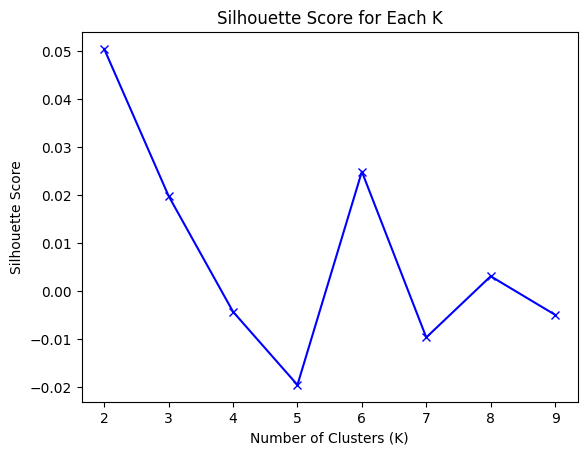

In [ ]:
from sklearn.metrics import silhouette_score

k_values = range(2, 10)  # 시도할 K 값의 범위
silhouette_scores = []

for k in k_values:
  tfidf = TfidfVectorizer()
  tfidf_vectors = tfidf.fit_transform( data2['rv_noun0'] )
  kmeans = KMeans(n_clusters=k, n_init='auto')
  kmeans.fit(tfidf_vectors)
  labels = kmeans.labels_
  silhouette_avg = silhouette_score(tfidf_vectors, labels)
  silhouette_scores.append(silhouette_avg)

# K 값에 대한 실루엣 계수 시각화
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Each K')
plt.show()

In [ ]:
tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform( data2['rv_noun0'] )
feature_names=tfidf.get_feature_names_out()

k=6
kmeans=KMeans(n_clusters=k,max_iter=1000,random_state=2023)
kmeans_label = kmeans.fit_predict(tfidf_vectors)
kmeans_centers = kmeans.cluster_centers_

data2['cluster']=kmeans_label
data2['cluster'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-283-f840053be669>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['cluster']=kmeans_label


5    24
1    19
3     2
2     2
4     2
0     1
Name: cluster, dtype: int64

In [ ]:
for cluster_num in set(kmeans_label):
  print('\n','Cluster: {}'.format(cluster_num))
  df=data2[ data2['cluster'] == cluster_num ]
  for title in df['title']:
    print(title)


 Cluster: 0
그리고 모든 것이 변했다

 Cluster: 1
당신은 결국 무엇이든 해내는 사람(10만 부 기념 특별 리커버 에디션)
작은 별이지만 빛나고 있어(20만 부 기념 한정판 에디션)
기분이 태도가 되지 말자
잘될 수밖에 없는 너에게(10만부 기념 응원 에디션)
잘했고 잘하고 있고 잘 될 것이다(스페셜 리미티드 에디션)
열 번 잘해도 한 번 실수로 무너지는 게 관계다
꽃을 보듯 너를 본다
누구에게도 상처받을 필요는 없다
잘 살고 싶은 마음이 어렵게 느껴질 때
바다는 잘 있습니다
기분을 관리하면 인생이 관리된다
나는 오래된 거리처럼 너를 사랑하고
너의 하루가 따숩길 바라
언어의 온도(170만부 기념 에디션)
나에게 고맙다(30만 부 기념 전면 개정판)
나는 당신이 행복했으면 좋겠습니다
모든 사람에게 좋은 사람일 필요는 없어
죽고 싶지만 떡볶이는 먹고 싶어
안녕, 소중한 사람

 Cluster: 2
빅터 프랭클의 죽음의 수용소에서
죽음의 수용소에서

 Cluster: 3
괜찮은 어른이 되고 싶어서
생에 감사해

 Cluster: 4
이대호, 도전은 끝나지 않았다
모든 것은 기본에서 시작한다

 Cluster: 5
이지성의 1만 킬로미터
찌그러져도 괜찮아
나의 봄날인 너에게
괜찮아, 그 길 끝에 행복이 기다릴 거야
한 번뿐인 인생은 어떻게 살아야 하는가
우리에게는 온기가 있기에
미셸 오바마 자기만의 빛
인생의 역사
망그러진 만화(벚꽃 에디션)
고요한 포옹
달리기를 말할 때 내가 하고 싶은 이야기
불안
월든(완결판)
그냥 밥 먹자는 말이 아니었을지도 몰라
무례한 사람에게 웃으며 대처하는 법(50만 부 기념 스페셜 개정판)
마음 방울 채집
어린이라는 세계
우아한 언어
오늘부터 300일
여행의 이유
망그러진 만화(벚꽃 에디션 & 벚꽃 향수 박스 한정판)
형사 박미옥
누군가는 사랑을 말해야 하지 않을까
그대 늙어가는 것이 아니라 익어가는 것이다


In [ ]:
centroid_feature = kmeans_centers.argsort()[:,::-1]

for cluster_num in set(kmeans_label):
    print('Cluster: {}'.format(cluster_num))

    df=data2[ data2['cluster'] == cluster_num ]
    print(df['title'].tolist())

    top_feature_indexes =centroid_feature[cluster_num,:10]
    top_features = [feature_names[i] for i in top_feature_indexes ]
    print(top_features)

    top_feature_values = kmeans_centers[cluster_num, top_feature_indexes].tolist()
    print(top_feature_values, '\n')

Cluster: 0
['그리고 모든 것이 변했다']
['체험', '아니타', '임사', '죽음', '영혼', '사랑', '생각', '관습', '경험', '허용']
[0.44863453107749496, 0.35021542946203454, 0.3167143893216903, 0.27937164195309566, 0.18943707218939154, 0.16466796159767794, 0.1490059503202664, 0.1357347382807244, 0.1292672900187098, 0.11764631582010707] 

Cluster: 1
['당신은 결국 무엇이든 해내는 사람(10만 부 기념 특별 리커버 에디션)', '작은 별이지만 빛나고 있어(20만 부 기념 한정판 에디션)', '기분이 태도가 되지 말자', '잘될 수밖에 없는 너에게(10만부 기념 응원 에디션)', '잘했고 잘하고 있고 잘 될 것이다(스페셜 리미티드 에디션)', '열 번 잘해도 한 번 실수로 무너지는 게 관계다', '꽃을 보듯 너를 본다', '누구에게도 상처받을 필요는 없다', '잘 살고 싶은 마음이 어렵게 느껴질 때', '바다는 잘 있습니다', '기분을 관리하면 인생이 관리된다', '나는 오래된 거리처럼 너를 사랑하고', '너의 하루가 따숩길 바라', '언어의 온도(170만부 기념 에디션)', '나에게 고맙다(30만 부 기념 전면 개정판)', '나는 당신이 행복했으면 좋겠습니다', '모든 사람에게 좋은 사람일 필요는 없어', '죽고 싶지만 떡볶이는 먹고 싶어', '안녕, 소중한 사람']
['마음', '위로', '생각', '공감', '선물', '제목', '내용', '힐링', '사랑', '관계']
[0.33096877314394574, 0.19250959919757765, 0.17733134319143443, 0.15321068755200318, 0.15033375411115407, 0.11524291381920485, 0.11398542247543447, 0.113700738636

# **가정/육아**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

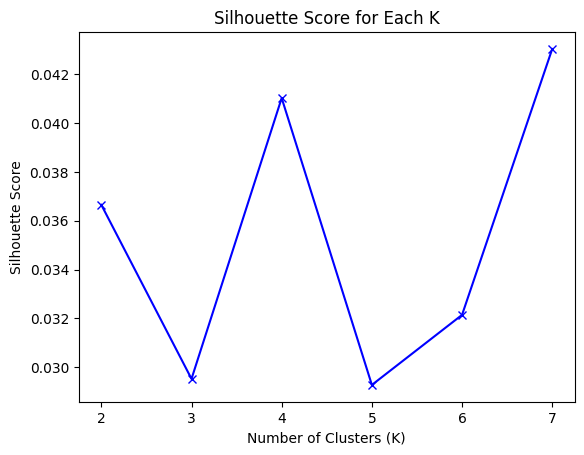

In [ ]:
from sklearn.metrics import silhouette_score

k_values = range(2, 8)  # 시도할 K 값의 범위
silhouette_scores = []

for k in k_values:
  tfidf = TfidfVectorizer()
  tfidf_vectors = tfidf.fit_transform( data4['rv_noun0'] )
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(tfidf_vectors)
  labels = kmeans.labels_
  silhouette_avg = silhouette_score(tfidf_vectors, labels)
  silhouette_scores.append(silhouette_avg)

# K 값에 대한 실루엣 계수 시각화
plt.plot(k_values, silhouette_scores, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Each K')
plt.show()

In [ ]:
tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform( data4['rv_noun0'] )
feature_names=tfidf.get_feature_names_out()

k=7
kmeans=KMeans(n_clusters=k,max_iter=1000,random_state=2023)
kmeans_label = kmeans.fit_predict(tfidf_vectors)
kmeans_centers = kmeans.cluster_centers_

data4['cluster']=kmeans_label
data4['cluster'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-291-7aed32a892a3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['cluster']=kmeans_label


3    11
0    10
5     9
4     6
2     5
1     5
6     4
Name: cluster, dtype: int64

In [ ]:
for cluster_num in set(kmeans_label):
  print('\n','Cluster: {}'.format(cluster_num))
  df=data4[ data4['cluster'] == cluster_num ]
  for title in df['title']:
    print(title)


 Cluster: 0
세상에서 가장 쉬운 본질육아
어떻게 말해줘야 할까
내 아이를 위한 주의력 수업
이성을 잃지 않고 아이를 대하는 마음챙김 육아
금쪽이들의 진짜 마음속
아이가 버거운 엄마 엄마가 필요한 아이
조선미의 현실 육아 상담소
아이는 엄마의 자존감을 먹고 자란다
아이라는 숲
하루 5분 아빠 목소리

 Cluster: 1
이은경쌤의 초등어휘일력 365
엄마의 내공으로 영어를 다시 시작합니다
하루 한 장 365 인문학 달력(리커버)
올리버쌤의 미국식 아이 영어 습관 365
우리 아이 첫 영어 공부

 Cluster: 2
66일 인문학 대화법
부모의 말
0~5세 말걸기 육아의 힘
어린이를 위한 초등 매일 글쓰기의 힘: 세줄쓰기
부모 인문학 수업

 Cluster: 3
똑게육아
임신 출산 육아 대백과(2022~2023)
아기 발달 백과
삐뽀삐뽀 119 소아과
베싸육아
엄마 나는 자라고 있어요
잘 자고 잘 먹는 아기의 시간표
프랑스 아이처럼
하루 한 장 임신 출산 데일리북
홈파티스타
아이 마음에 상처 주지 않는 습관(뉴에디션)

 Cluster: 4
사춘기 아들의 마음을 잡아주는 부모의 말 공부
사춘기 딸에게 힘이 되어주는 부모의 말 공부
ADHD 우리 아이 어떻게 키워야 할까
아들의 뇌
10대 놀라운 뇌 불안한 뇌 아픈 뇌
부모 심리 수업

 Cluster: 5
세상에서 제일 재밌는 종이접기
어머니, 사교육을 줄이셔야 합니다
EBS 당신의 문해력(초등 어휘력 향상 워크북 특별 부록 한정판)
교과서는 사교육보다 강하다
국어머리 공부법
스카이 버스
4~7세보다 중요한 시기는 없습니다
늦기 전에 공부정서를 키워야 합니다
공부하는 뇌, 성장하는 마음

 Cluster: 6
감정에 휘둘리는 아이 감정을 잘 다루는 아이
내 아이를 위한 감정코칭
엄마의 말 연습
못 참는 아이 욱하는 부모


In [ ]:
centroid_feature = kmeans_centers.argsort()[:,::-1]

for cluster_num in set(kmeans_label):
    print('Cluster: {}'.format(cluster_num))

    df=data4[ data4['cluster'] == cluster_num ]
    print(df['title'].tolist())

    top_feature_indexes =centroid_feature[cluster_num,:10]
    top_features = [feature_names[i] for i in top_feature_indexes ]
    print(top_features)

    top_feature_values = kmeans_centers[cluster_num, top_feature_indexes].tolist()
    print(top_feature_values, '\n')

Cluster: 0
['세상에서 가장 쉬운 본질육아', '어떻게 말해줘야 할까', '내 아이를 위한 주의력 수업', '이성을 잃지 않고 아이를 대하는 마음챙김 육아', '금쪽이들의 진짜 마음속', '아이가 버거운 엄마 엄마가 필요한 아이', '조선미의 현실 육아 상담소', '아이는 엄마의 자존감을 먹고 자란다', '아이라는 숲', '하루 5분 아빠 목소리']
['생각', '마음', '도움', '오은영', '우리', '주의력', '박사', '동화', '부분', '본질']
[0.20167238419041236, 0.162505263086829, 0.10570172807362495, 0.10454452870772635, 0.08632800242275088, 0.0842258302896921, 0.07392135873214595, 0.07269925144577659, 0.06653844851491944, 0.06521844241866656] 

Cluster: 1
['이은경쌤의 초등어휘일력 365', '엄마의 내공으로 영어를 다시 시작합니다', '하루 한 장 365 인문학 달력(리커버)', '올리버쌤의 미국식 아이 영어 습관 365', '우리 아이 첫 영어 공부']
['영어', '하루', '달력', '단어', '어휘', '문장', '표현', '존경', '신간', '식탁']
[0.39154562947969507, 0.1761487599829794, 0.1489029573262524, 0.11605031972353122, 0.1157141139701114, 0.11434701352346782, 0.0833073410318757, 0.07724417262244841, 0.07724417262244841, 0.07337480721680906] 

Cluster: 2
['66일 인문학 대화법', '부모의 말', '0~5세 말걸기 육아의 힘', '어린이를 위한 초등 매일 글쓰기의 힘: 세줄쓰기', '부모 인문학 수업']
['글쓰기', '언어', '인문학', '대화', '생각',